# Modeling Pandemics

## Introduction to non-linear dynamics

* Logistic growth
* Kermack-Mckendrick
* Concept - nullcline
* Imperfect Immunity Model - (used widely in modeling COVID dynamics)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Define logistic equation (sometimes as the Verhulst equation)

def verhulst(state, t):
    I = state[0] # Number of infected individuals
    dIdt = a * I * (N - I) # fixed point when equal to zero
    return dIdt

In [3]:
# Pick some parameters
a = 0.4 # Growth rate
N = 100 # Total carrying capacity (maximum expected population size)

# Initial conditions
state0 = 1

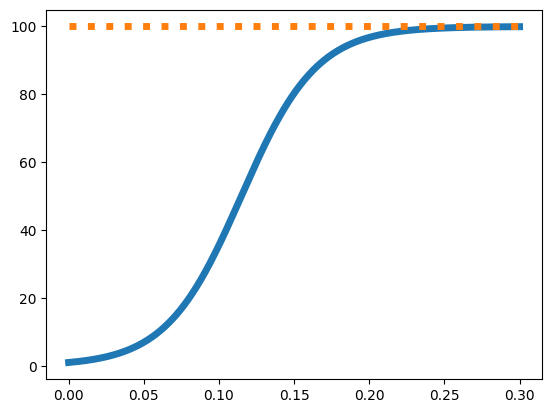

In [5]:
from scipy.integrate import odeint

t = np.linspace(0, 0.3, 1000)

state = odeint(verhulst, state0, t)

plt.plot(t, state, linewidth = 5)
plt.plot(t, N*np.ones(t.shape), linestyle = ':', linewidth = 5)

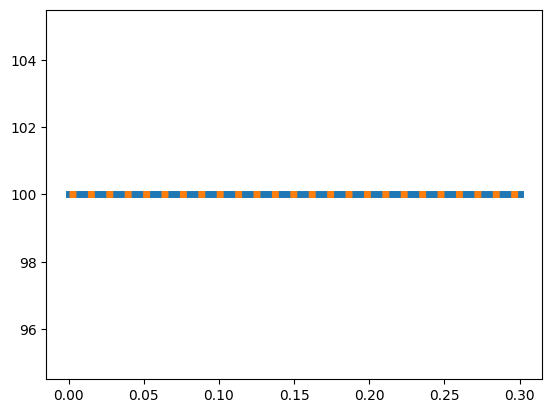

In [7]:
# Starting at exactly the carrying capacity

# Initial conditions
state0 = N

state = odeint(verhulst, state0, t)

plt.plot(t, state, linewidth = 5)
plt.plot(t, N*np.ones(t.shape), linestyle = ':', linewidth = 5)

# when drowth rate and death rate balance each other out, no change (fixed point of system)

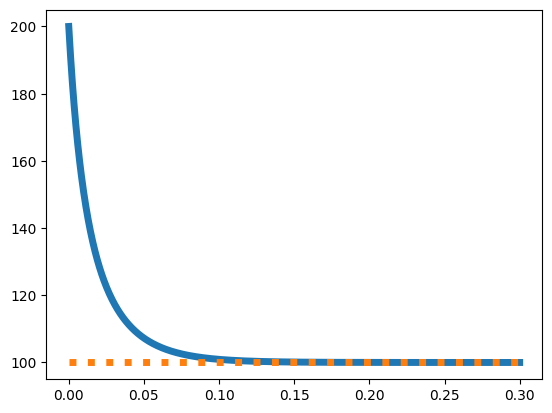

In [9]:
# what if we start above the carrying capacity

# Initial conditions
state0 = 200

state = odeint(verhulst, state0, t)

plt.plot(t, state, linewidth = 5)
plt.plot(t, N*np.ones(t.shape), linestyle = ':', linewidth = 5)

# massive die off, death rate exceeds growth rate


# add another dimension to model
# kermack-mckendrick model

We add a term for the recovery or immunity after infection

$\dot{I} = a I S - \frac{I}{\tau} \newline$
$ \dot{S} = -a I S$

In [11]:
# define the KM model
def kermack(state, t):
    # unpack both state variables
    I = state[0] # number of infected individuals
    S = state[1] # number of susceptible individual

    # define system of equations
    dIdt = a*I*S - I/tau # I/tau is rate of people recovering from infection
    dSdt = -a*I*S # inverse of the growth term of infected people

    return(dIdt, dSdt)


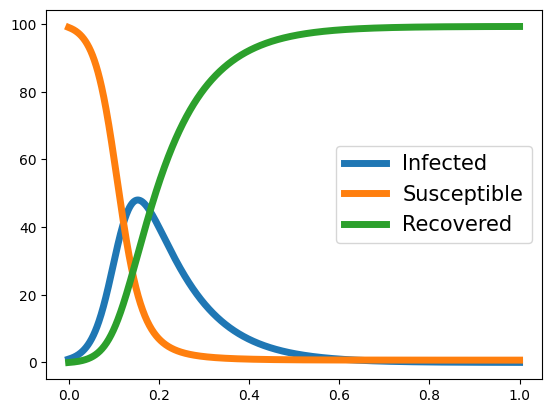

In [15]:
# pick Kermack parameters

a = 0.5
tau = 0.1 # people recover at 1/5 of rate that they are infected

# two dimensions needing two initial conditions
state0 = [1, 99] # one infected, 99 susceptible

# establish the time vector
t = np.linspace(0, 1, 1000)

# run the numerical intergration
state = odeint(kermack, state0, t)

# recocery as a function of time
N = np.sum(state0)
def Rt(N, It, St):
    Nvec = N*np.ones(St.shape)
    return (Nvec - St - It)

plt.plot(t, state, linewidth = 5)
plt.plot(t, Rt(N, state[:,0], state[:,1]), linewidth = 5)
plt.legend(('Infected', 'Susceptible', 'Recovered'), fontsize = 15)

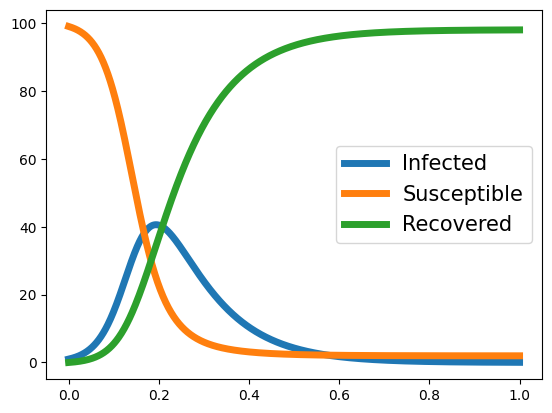

In [23]:
# changing alpha and see what happens

a = 0.4
tau = 0.1 # people recover at 1/5 of rate that they are infected

# two dimensions needing two initial conditions
state0 = [1, 99] # one infected, 99 susceptible

# establish the time vector
t = np.linspace(0, 1, 1000)

# run the numerical intergration
state = odeint(kermack, state0, t)

# recocery as a function of time
N = np.sum(state0)
def Rt(N, It, St):
    Nvec = N*np.ones(St.shape)
    return (Nvec - St - It)

plt.plot(t, state, linewidth = 5)
plt.plot(t, Rt(N, state[:,0], state[:,1]), linewidth = 5)
plt.legend(('Infected', 'Susceptible', 'Recovered'), fontsize = 15)

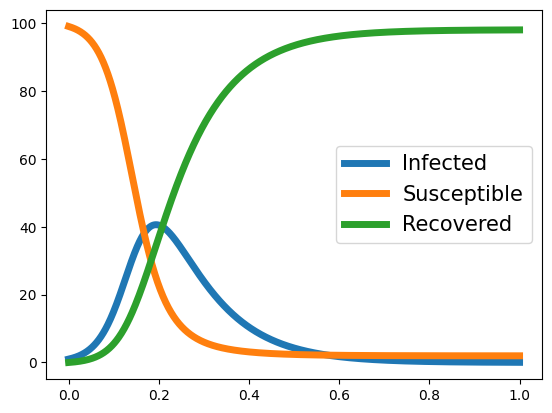

In [17]:
# changing alpha and see what happens

a = 0.4
tau = 0.1 # people recover at 1/5 of rate that they are infected

# two dimensions needing two initial conditions
state0 = [1, 99] # one infected, 99 susceptible

# establish the time vector
t = np.linspace(0, 1, 1000)

# run the numerical intergration
state = odeint(kermack, state0, t)

# recocery as a function of time
N = np.sum(state0)
def Rt(N, It, St):
    Nvec = N*np.ones(St.shape)
    return (Nvec - St - It)

plt.plot(t, state, linewidth = 5)
plt.plot(t, Rt(N, state[:,0], state[:,1]), linewidth = 5)
plt.legend(('Infected', 'Susceptible', 'Recovered'), fontsize = 15)

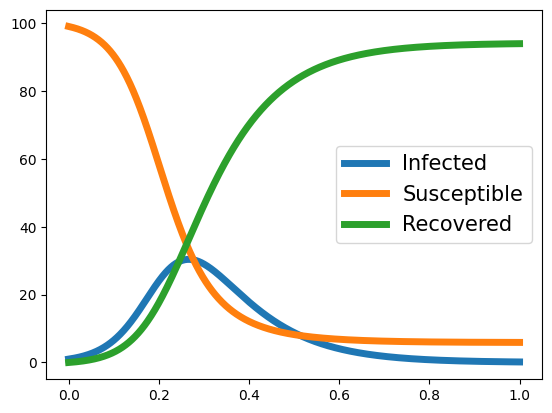

In [18]:
# changing alpha and see what happens

a = 0.3
tau = 0.1 # people recover at 1/5 of rate that they are infected

# two dimensions needing two initial conditions
state0 = [1, 99] # one infected, 99 susceptible

# establish the time vector
t = np.linspace(0, 1, 1000)

# run the numerical intergration
state = odeint(kermack, state0, t)

# recocery as a function of time
N = np.sum(state0)
def Rt(N, It, St):
    Nvec = N*np.ones(St.shape)
    return (Nvec - St - It)

plt.plot(t, state, linewidth = 5)
plt.plot(t, Rt(N, state[:,0], state[:,1]), linewidth = 5)
plt.legend(('Infected', 'Susceptible', 'Recovered'), fontsize = 15)

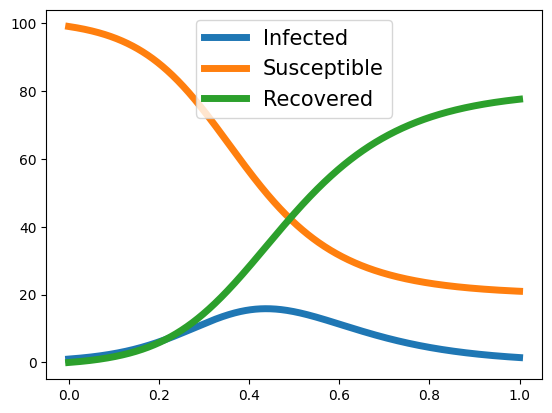

In [20]:
# changing alpha and see what happens

a = 0.2
tau = 0.1 # people recover at 1/5 of rate that they are infected

# two dimensions needing two initial conditions
state0 = [1, 99] # one infected, 99 susceptible

# establish the time vector
t = np.linspace(0, 1, 1000)

# run the numerical intergration
state = odeint(kermack, state0, t)

# recocery as a function of time
N = np.sum(state0)
def Rt(N, It, St):
    Nvec = N*np.ones(St.shape)
    return (Nvec - St - It)

plt.plot(t, state, linewidth = 5)
plt.plot(t, Rt(N, state[:,0], state[:,1]), linewidth = 5)
plt.legend(('Infected', 'Susceptible', 'Recovered'), fontsize = 15)

recovery rate = 10.0
maximum infection rate = 10.0


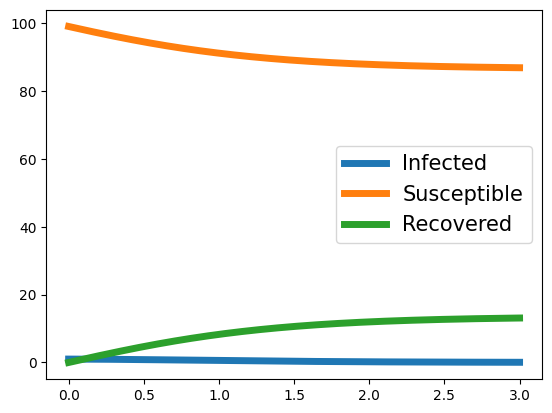

In [26]:
# changing alpha and see what happens

a = 0.1
tau = 0.1 # people recover at 1/5 of rate that they are infected

# two dimensions needing two initial conditions
state0 = [1, 99] # one infected, 99 susceptible

# establish the time vector
t = np.linspace(0, 3, 1000)

# run the numerical intergration
state = odeint(kermack, state0, t)

# recocery as a function of time
N = np.sum(state0)
def Rt(N, It, St):
    Nvec = N*np.ones(St.shape)
    return (Nvec - St - It)

plt.plot(t, state, linewidth = 5)
plt.plot(t, Rt(N, state[:,0], state[:,1]), linewidth = 5)
plt.legend(('Infected', 'Susceptible', 'Recovered'), fontsize = 15)

print(f'recovery rate = {1/tau}\nmaximum infection rate = {a*N}')
# when infection rate is greater than recovery rate, we get an outbreak, equal does not

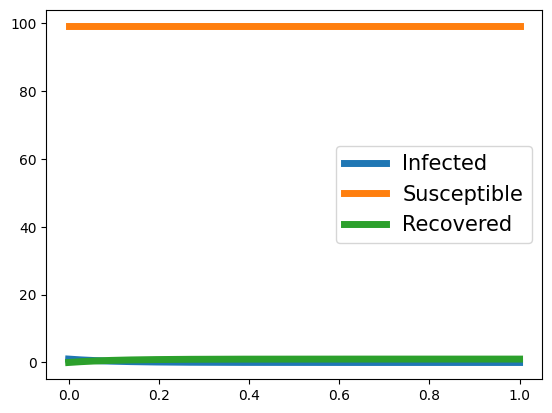

In [22]:
# changing alpha and see what happens

a = 0
tau = 0.1 # people recover at 1/5 of rate that they are infected

# two dimensions needing two initial conditions
state0 = [1, 99] # one infected, 99 susceptible

# establish the time vector
t = np.linspace(0, 1, 1000)

# run the numerical intergration
state = odeint(kermack, state0, t)

# recocery as a function of time
N = np.sum(state0)
def Rt(N, It, St):
    Nvec = N*np.ones(St.shape)
    return (Nvec - St - It)

plt.plot(t, state, linewidth = 5)
plt.plot(t, Rt(N, state[:,0], state[:,1]), linewidth = 5)
plt.legend(('Infected', 'Susceptible', 'Recovered'), fontsize = 15)

Text(0, 0.5, 'Susceptible Indiviuals')

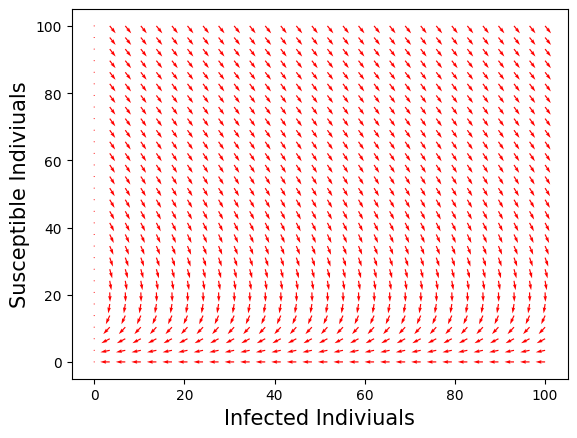

In [28]:
# plotting a phase diagram

a = 0.5
Ilim = [0, 100]
Slim = [0, 100]

npoints = 30 # pick the resolution of our phase portrait

# set up meshgrid function for evaluating the dynamics at many states
h1 = np.linspace(Ilim[0], Ilim[1], npoints)
h2 = np.linspace(Ilim[0], Ilim[1], npoints)

# generate meshgrid
H1, H2 = np.meshgrid(h1, h2)

u, v = np.zeros(H1.shape), np.zeros(H2.shape)

NJ, NK = H1.shape
# two nested for loops to evaluate the dynamics on the meshgrid
for j in range(NJ):
    for k in range(NK):

        Istate = H1[j, k]
        Sstate = H2[j, k]

        statejk = [Istate, Sstate]

        # call differential equation to calc system velocity
        ISdot = kermack(statejk, [])

        u[j,k] = ISdot[0]
        v[j,k] = ISdot[1]


# normalize vector lengths by the hypoteneuse
M = (np.hypot(u,v))
M[M==0] = 1.
u /= M
v /= M

plt.quiver(H1, H2, u, v, color = 'red')
plt.xlabel('Infected Indiviuals', fontsize =15)
plt.ylabel('Susceptible Indiviuals', fontsize =15)



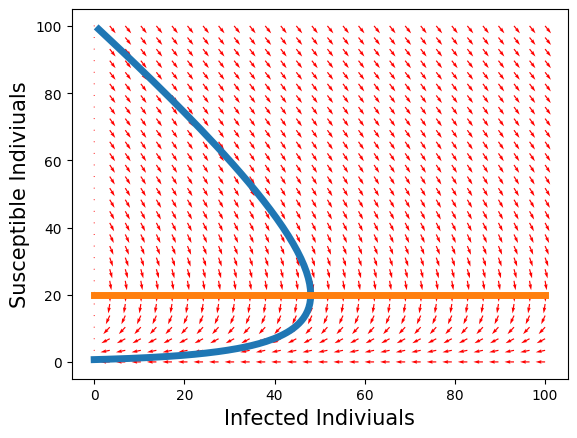

In [30]:
# plot trajectory
state = odeint(kermack, state0, t)

# solve for an plot special line where flow is only uni-directional
#corresponds to peak outbreak
#called nullcline
# tells us global dynamics of system
Inullcline = 1/(tau*a)

plt.quiver(H1, H2, u, v, color = 'red')
plt.xlabel('Infected Indiviuals', fontsize =15)
plt.ylabel('Susceptible Indiviuals', fontsize =15)
plt.plot(state[:,0], state[:,1], linewidth = 5)
plt.plot(np.linspace(0, 100, 100), Inullcline*np.ones(100), linewidth = 5)

In [31]:
# ^^^^^^ whole line of fixed points where zero


# when all of the vector flow is perfectly in y direction, indicates max number of infected individuals (orange line)
    # this is where the rate of change of infection equals zero

# Modeling Imperfect Immunity

### Happens when pool of immune memory cells degrades over time
##### We would like to make this as slow as possible

In [39]:
def ImperfectImmunity(state, t):
    I = state[0]
    S = state[1]

    # define system with imperfect immunity
    dIdt = a*I*S - I/tau
    R = N -S - I #recovered individuals
    dSdt = -a*I*S + R/tau2 # introduce a second timescale of forgetting

    return(dIdt, dSdt)


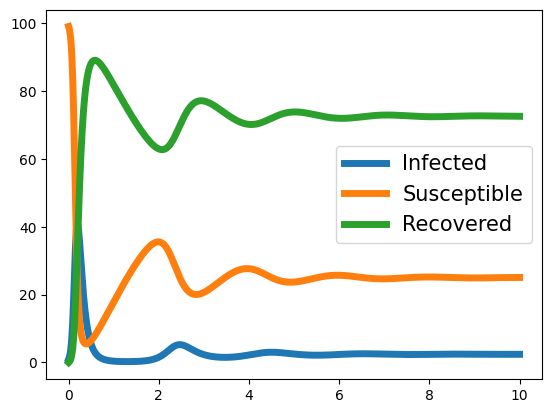

In [42]:
a = 0.4
tau = 0.1
tau2 = 1 # 10x the rate of immunological loss than recovery in the system
tau2 = 3
state0 = [1,99]

N = np.sum(state0)
t = np.linspace(0, 10, 1000)

state = odeint(ImperfectImmunity, state0, t)

plt.plot(t, state, linewidth = 5)
plt.plot(t, Rt(N, state[:,0], state[:,1]), linewidth = 5)
plt.legend(('Infected', 'Susceptible', 'Recovered'), fontsize = 15)

(0.0, 40.0)

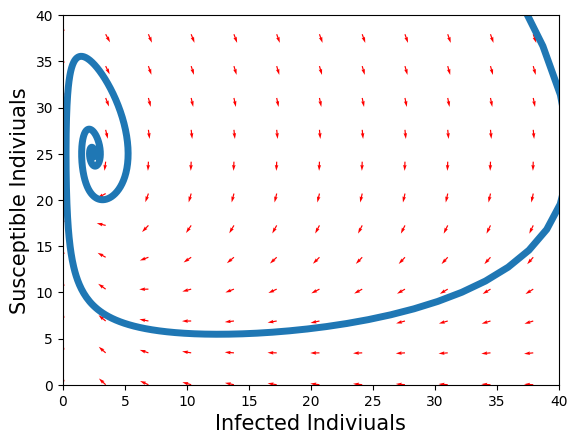

In [43]:
# 

# plotting a phase diagram

Ilim = [0, 100]
Slim = [0, 100]

npoints = 30 # pick the resolution of our phase portrait

# set up meshgrid function for evaluating the dynamics at many states
h1 = np.linspace(Ilim[0], Ilim[1], npoints)
h2 = np.linspace(Ilim[0], Ilim[1], npoints)

# generate meshgrid
H1, H2 = np.meshgrid(h1, h2)

u, v = np.zeros(H1.shape), np.zeros(H2.shape)

NJ, NK = H1.shape

# two nested for loops to evaluate the dynamics on the meshgrid
for j in range(NJ):
    for k in range(NK):

        Istate = H1[j, k]
        Sstate = H2[j, k]

        statejk = [Istate, Sstate]

        # call differential equation to calc system velocity
        ISdot = ImperfectImmunity(statejk, [])

        u[j,k] = ISdot[0]
        v[j,k] = ISdot[1]


# normalize vector lengths by the hypoteneuse
M = (np.hypot(u,v))
M[M==0] = 1.
u /= M
v /= M

plt.quiver(H1, H2, u, v, color = 'red')
plt.xlabel('Infected Indiviuals', fontsize =15)
plt.ylabel('Susceptible Indiviuals', fontsize =15)
plt.plot(state[:,0], state[:,1], linewidth = 5)

plt.ylim((0,40))
plt.xlim((0,40))